### 강화학습 환경 [OpenAI Gym](https://github.com/openai/gym/wiki/Leaderboard#mountaincar-v0)
* OpenAI 재단은 강화학습의 이론을 학습하기 위해 만들어 놓은 환경인 Gym을 2016년에 발표했고 이것은 세계의 연구자들 사이에 거의 표준으로 자리잡았음
* Gym에는 전통적인 알고리즘 흉내내기, Box2D를 사용한 물리 조작계, 아타리(Atari) 게임, 로봇 시뮬레이션 등 다양한 환경이 포함되어 있음
* 다른 연구자들이 Gym과 호환되는 새로운 환경을 만들어서 배포하는 것도 가능함
---
* Gym의 구조는 강화학습에서 요구하는 표준적인 구조임
* 문제가 주어진 환경(environment)이 있고, 강화학습 문제를 풀기 위한 에이전트(agent)가 존재함
* 에이전트는 행동(action)으로 환경에 영향을 주고, 그 결과에 따라 보상(reward)을 받음
* 좋은 보상을 받으면 에이전트는 그 행동을 더 많이 하게 되고, 나쁜 보상을 받으면 그 행동을 덜 하도록 학습하는 것이 강화학습의 기본임
* 강화학습은 행동의 결과로 주어지는 보상을 극대화하는 데 주 목적이 있음

### 신경망으로 경험 학습하기 : Gym MountainCar-v0
* 두 바퀴가 달린 차(에이전트)로 언덕(환경)을 올라가는 문제임
<br> - 저전력 자동차를 언덕 꼭대기까지 오십시오 (상단 = 0.5 위치)
* 보상은 각 시간 단위(time step)마다 -1이 주어지고, 오른쪽의 깃발에 도달하면 하나의 에피소드(episode)가 끝남
* 즉, 보상은 음수로 주어지며 에피소드를 빨리 끝낼수록 한 에피소드에서 얻는 보상의 총합이 커지기 때문에 가장 짧은 시간 내에 언덕을 올라가야 함 (-100보다는 -99가 좋은 보상임)
---
[MountainCar-v0 Environment](https://github.com/openai/gym/wiki/MountainCar-v0)
* Agent Action 3가지 : 왼쪽으로 이동(0), 정지(1), 오른쪽으로 이동(2)
<br> - 왼쪽과 오른쪽으로 반복해서 움직이며 가속도를 붙인 다음에야 언덕을 올라갈 수 있음
* Observation : Position(-1.2 ~ 0.6), Velocity(-0.07 ~ 0.07)
* Reward : 목표 위치 0.5에 도달 할 때까지 각 시간 단계마다 -1, 언덕을 오르면 페널티가 없어 벽에 도달함
* Starting State : 속도가없는 -0.6 ~ -0.4의 임의 위치
* Episode Termination : 에피소드는 0.5 위치에 도달하거나 200 회 반복에 도달하면 종료됨
* Solved Requirements : 100 회 연속 시험에서 평균 -110.0의 보상을받는 것

In [ ]:
colab = 1
test = 1

In [ ]:
# import tensorflow as tf 
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#     # Currently, memory growth needs to be the same across GPUs
#     for gpu in gpus:
#       tf.config.experimental.set_memory_growth(gpu, True)
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Memory growth must be set before GPUs have been initialized
#     print(e)

In [ ]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.5.0


In [ ]:
if colab:
    !pip install gym pyvirtualdisplay
    !apt-get install -y xvfb python-opengl ffmpeg

    !apt-get update
    !apt-get install cmake
    !pip install --upgrade setuptools
    !pip install ez_setup
    !pip install gym[atari]

    !pip install box2d-py
    !pip install gym[Box_2D]
else:
    #!pip install gym
    pass

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl xvfb
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,281 kB of archives.
After this operation, 7,686 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.9 [784 kB]
Fetched 1,281 kB in 1s (970 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 160815 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Selecting previously unselected package xvfb.
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.9_amd64

  Created wheel for ez-setup: filename=ez_setup-0.9-cp37-none-any.whl size=11014 sha256=0a69b1271a66d7fc97ae26c9a4ca7d56b2e1856472dc9b6c09aa8d01b88d82a5
  Stored in directory: /root/.cache/pip/wheels/dc/e8/6b/3d5ff5a3efd7b5338d1e173ac981771e2628ceb2f7866d49ad
Successfully built ez-setup
     |████████████████████████████████| 450kB 8.1MB/s 


In [ ]:
# MountainCar-v0 환경 만들기

import gym
import random

env = .................
env

<TimeLimit<MountainCarEnv<MountainCar-v0>>>

In [ ]:
print(env.______)
print(env.______)
print(env.______)
print(env.______)
print(env.______)
print(env.______)
print(env.______)
print(env.______)

Discrete(3)
<bound method Wrapper.class_name of <class 'gym.wrappers.time_limit.TimeLimit'>>
<MountainCarEnv<MountainCar-v0>>
Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
(-inf, inf)
EnvSpec(MountainCar-v0)
<bound method TimeLimit.step of <TimeLimit<MountainCarEnv<MountainCar-v0>>>>
<bound method TimeLimit.reset of <TimeLimit<MountainCarEnv<MountainCar-v0>>>>


In [ ]:
# 환경의 관찰 공간, 행동 공간 변수 확인
print(env.observation_space)
print(env.observation_space.____)  # [x좌표, velocity] [-1.2  -0.07]
print(env.observation_space.____) # [x좌표, velocity] [0.6  0.07]
print()
print(env.action_space)
print(env.action_space.___)  # 3  (0:left, 1:stop, 2:right)
print()
print(env._________)

Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
[-1.2  -0.07]
[0.6  0.07]

Discrete(3)
3

200


In [ ]:
if colab:
    # env.render() 함수의 결과를 mp4 동영상으로 보여주기 위한 코드
    # from https://colab.research.google.com/drive/1flu31ulJlgiRL1dnN2ir8wGh9p7Zij2t
    from gym import logger as gymlogger
    from gym.wrappers import Monitor
    gymlogger.set_level(40) #error only
    import glob
    import io
    import base64
    from IPython.display import HTML
    from IPython import display as ipythondisplay

    """
    Utility functions to enable video recording of gym environment and displaying it
    To enable video, just do "env = wrap_env(env)""
    """

    def show_video():
        mp4list = glob.glob('video/*.mp4')
        if len(mp4list) > 0:
            mp4 = mp4list[0]
            video = io.open(mp4, 'r+b').read()
            encoded = base64.b64encode(video)
            ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                 </video>'''.format(encoded.decode('ascii'))))
        else: 
            print("Could not find video")


    def wrap_env(env):
        env = Monitor(env, './video', force=True)
        return env
    
    
    from pyvirtualdisplay import Display
    display = Display(visible=0, size=(1400, 900))
    display.start()

In [ ]:
if test:
    # 랜덤 행동 에이전트의 환경 실행 결과 확인
    if colab: env = ________(gym.make('MountainCar-v0'))
    else: env = gym.make('MountainCar-v0')
    env.reset()
    input('Enter to start ..')

    score = 0
    step = 0
    while True:
        action = env.action_space._______
        obs, reward, done, info = env.______
        score += reward
        step += 1
    #     print('==>step_', + step, ' action: ', action, 'obs:', obs, 'reward:', reward, 'done:', done, 'info:', info)
    #     print('-->step_', + step, 'score:', score)
  
        if not colab: 
            if(step%10 == 0) :
                input(f'Enter to continue({step}) ..')
            env.______    

        if done:
            input('Enter to stop ..')
            env._______
            break

    print('score:', score)
    print('step:', step)
    if colab: 
        ____________
        

Enter to start ..
Enter to stop ..
score: -200.0
step: 200


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
-199.9028
[-174.0, -180.0, -192.0, -184.0, -180.0, -184.0, -194.0, -184.0, -182.0, -186.0, -162.0, -190.0, -196.0, -180.0, -194.0, -176.0, -186.0, -194.0, -164.0, -190.0, -196.0, -192.0, -168.0, -194.0, -190.0, -166.0, -190.0, -186.0, -182.0, -174.0, -176.0, -180.0, -194.0, -186.0, -176.0, -192.0, -182.0, -194.0, -182.0, -192.0, -170.0, -178.0, -182.0, -138.0, -180.0, -190.0, -188.0, -162.0, -180.0, -184.0, -184.0, -158.0, -184.0, -188.0]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


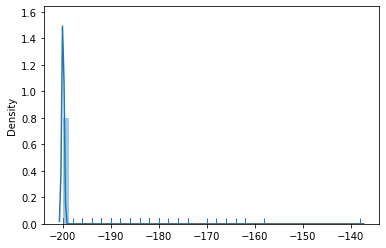

In [ ]:
# 성공적인 에피소드 저장
env = gym.make('MountainCar-v0')

scores = []
training_data = []
accepted_scores = []
required_score = -198

for i in range(10000):
    if i % 100 == 0:
        print(i)
    env.reset()
    score = 0
    game_memory = []
    previous_obs = []
    
    while True:
        action = env.____________
        obs, reward, done, info = env._______
        
        if len(previous_obs) > 0:
            game_memory.append( ______________ )
        
        previous_obs = obs
        # 성공적인 스텝은 가속도를 이용해 약간이라도 앞으로 전진한 것으로 정의하여 +1 reward를 줌
        if obs[0] > -0.2:
            reward = 1
        
        score += reward
        
        if done: break
        
    scores.____________
    # 3번 이상 -0.2보다 큰 x좌표 값을 기록했을 경우 성공적인 episode로 판단하여 메모리에 저장함
    if score > required_score:
        accepted_scores.append(score)
        for data in game_memory:
            ___________.append(data)

scores = np.array(scores)
print(scores.mean())
print(accepted_scores)

import seaborn as sns
sns.distplot(scores, rug=True)

In [ ]:
len(accepted_scores), len(accepted_scores)*199

(54, 10746)

In [ ]:
# training_data 확인
print(len(training_data))
print(training_data[:10])

10746
[[array([-5.70810933e-01,  3.55548178e-04]), 1], [array([-0.57010248,  0.00070846]), 2], [array([-0.56804637,  0.0020561 ]), 0], [array([-0.5666579 ,  0.00138847]), 1], [array([-0.56494738,  0.00171052]), 2], [array([-0.56192754,  0.00301984]), 0], [array([-0.55962087,  0.00230667]), 1], [array([-0.55704455,  0.00257631]), 1], [array([-0.55421782,  0.00282674]), 2], [array([-0.55016176,  0.00405606]), 1]]


In [ ]:
# 훈련 데이터 만들기
train_X = np.array([i[0] for i in training_data]).reshape(-1, 2)
train_Y = np.array([i[1] for i in training_data]).reshape(-1, 1)
print(train_X.shape)
print(train_Y.shape)

(10746, 2)
(10746, 1)


In [ ]:
# 분류 신경망 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(____, activation='_______')
])
model.compile(optimizer=tf.optimizers.Adam(), loss='________________', metrics=['accuracy'])

In [ ]:
%%time
# local_gpu : 약 29초, colab : 약 42초 
# 분류 신경망 학습
history = model.fit(train_X, train_Y, epochs=30, batch_size=16, validation_split=0.25)

Epoch 1/30
504/504 [==============================] - 4s 3ms/step - loss: 1.0989 - accuracy: 0.3397 - val_loss: 1.0991 - val_accuracy: 0.3178
Epoch 2/30
504/504 [==============================] - 1s 3ms/step - loss: 1.0980 - accuracy: 0.3519 - val_loss: 1.0972 - val_accuracy: 0.3677
Epoch 3/30
504/504 [==============================] - 1s 3ms/step - loss: 1.0964 - accuracy: 0.3611 - val_loss: 1.0955 - val_accuracy: 0.4016
Epoch 4/30
504/504 [==============================] - 1s 3ms/step - loss: 1.0941 - accuracy: 0.3762 - val_loss: 1.0923 - val_accuracy: 0.3975
Epoch 5/30
504/504 [==============================] - 1s 2ms/step - loss: 1.0906 - accuracy: 0.3953 - val_loss: 1.0891 - val_accuracy: 0.3737
Epoch 6/30
504/504 [==============================] - 1s 3ms/step - loss: 1.0884 - accuracy: 0.3963 - val_loss: 1.0871 - val_accuracy: 0.3919
Epoch 7/30
504/504 [==============================] - 1s 3ms/step - loss: 1.0879 - accuracy: 0.4018 - val_loss: 1.0866 - val_accuracy: 0.3956
Epoch 

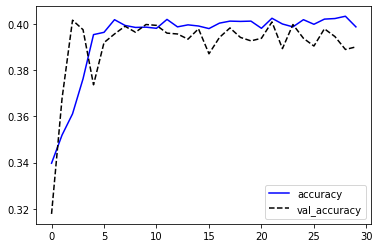

In [ ]:
# 분류 신경망 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
%%time
# local_gpu : 약 48분 40초, colab : 약 1시간 38분   --> ep500
# local_gpu : 약 분 초, colab : 약 8분   --> ep50
# 분류 신경망으로 에이전트 행동 확인
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

scores = []
steps = []
actions = []

# for i in range(500):
for i in range(50):
    if i % 10 == 0:        print('==>episode_', i)
    score = 0
    step = 0
    previous_obs = []
    env.reset()

    while True:
        if len(previous_obs) == 0:
            action = env.action_space.sample()
        else:
            logit_all = model._______(np.expand_dims(previous_obs, axis=0))
            logit = model._______(np.expand_dims(previous_obs, axis=0))[0]
            action = np.______(logit)
            actions.append(action)
        
        obs, reward, done, info = env.step(action)
        previous_obs = obs
        score += reward
        step += 1

        if done:
            env.close()
            break
    
    if i % 10 == 0: print('step:', step, 'logit:', logit, 'action:', action)
    scores.append(score)
    steps.append(step)
    
print('-->score:', score)
print('-->steps:', steps)

==>episode_ 0
step: 153 logit: [0.2431243 0.3289935 0.4278822] action: 2
==>episode_ 10
step: 83 logit: [0.33241624 0.3090429  0.3585409 ] action: 2
==>episode_ 20
step: 85 logit: [0.33829165 0.30800495 0.3537034 ] action: 2
==>episode_ 30
step: 158 logit: [0.2431243 0.3289935 0.4278822] action: 2
==>episode_ 40
step: 151 logit: [0.2431243 0.3289935 0.4278822] action: 2
-->score: -174.0
-->steps: [153, 112, 148, 84, 148, 148, 113, 146, 149, 146, 83, 166, 157, 143, 114, 144, 153, 86, 114, 144, 85, 146, 148, 145, 84, 145, 153, 158, 149, 154, 158, 151, 141, 143, 144, 148, 142, 146, 153, 155, 151, 158, 156, 84, 143, 146, 150, 84, 143, 174]
CPU times: user 7min 4s, sys: 15.4 s, total: 7min 19s
Wall time: 7min 41s


-137.76


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

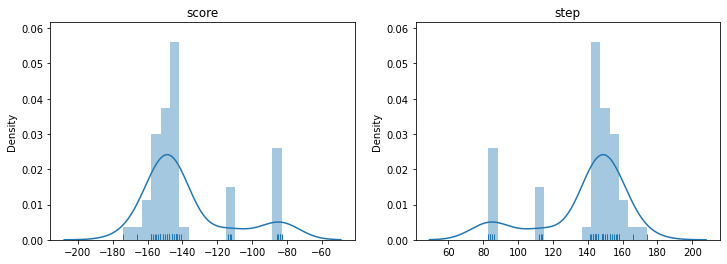

In [ ]:
# score, step 분포 확인
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.distplot(scores, rug=True, ax=ax[0])
sns.distplot(steps, rug=True, ax=ax[1])

print(np.mean(scores))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


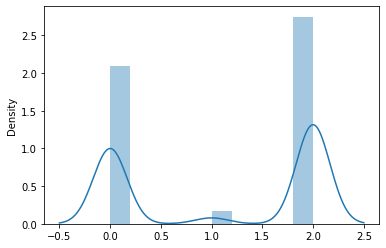

In [ ]:
# 행동 분포 확인
sns.distplot(actions)

In [ ]:
# 분류 신경망 행동 에이전트 실행 결과 확인
# env.close()
if colab: env = wrap_env(gym.make('MountainCar-v0'))
else: env = gym.make('MountainCar-v0')
env.reset()

score = 0
step = 0
previous_obs = []
while True:
    if len(previous_obs) == 0:
        action = env.action_space.sample()
    else:
        logit = model._______(np.expand_dims(previous_obs, axis=0))[0]
        action = np._______(logit)
    
    obs, reward, done, info = env._________
    previous_obs = obs
    score += reward
    step += 1
    
    if not colab: env.render()
    if done:
        env.close()        
        break

print('score:', score)
print('step:', step)
if colab :
    show_video()  


score: -159.0
step: 159


In [ ]:
!ls -F video

openaigym.episode_batch.1.61.stats.json
openaigym.manifest.1.61.manifest.json
openaigym.video.1.61.video000000.meta.json
openaigym.video.1.61.video000000.mp4
